In [5]:
import tweepy
import json
import numpy as np
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [11]:
consumer_key = open('../../consumer_key_twitter.txt').read()
consumer_secret = open('../../consumer_secret_twitter.txt').read()
access_token = open('../../acces_token_twitter.txt').read()
access_token_secret = open('../../acces_token_secret_twitter.txt').read()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [28]:
users=('@BBC', '@CBS', '@CNN', '@foxnews', '@nytimes')
#df=({'@BBC':[], '@CBS':[], '@CNN':[], '@foxnews':[], '@nytimes':[]})
df = pd.DataFrame(index=np.arange(100))
df_ = pd.DataFrame(index=np.arange(100))


In [31]:
#oldest_tweet = ""
compound_array=[]
positive_array=[]
negative_array=[]
neutral_array=[]
date_array=[]
text_array=[]

for user in users:
    page=1
    for x in range(5):
        public_tweets= api.user_timeline(user,page=page,) #problem with the max_id variable
        for tweet in public_tweets:
            compound_array.append(analyzer.polarity_scores(tweet['text'])['compound'])
            positive_array.append(analyzer.polarity_scores(tweet['text'])['pos'])
            negative_array.append(analyzer.polarity_scores(tweet['text'])['neg'])
            neutral_array.append(analyzer.polarity_scores(tweet['text'])['neu'])
            date_array.append(tweet['created_at'])
            text_array.append(tweet['text'])
            #oldest_tweet = tweet['id_str']
        page += 1
    
    df[user]=compound_array
    df_[user+' compound']=compound_array
    df_[user+' positive']=positive_array
    df_[user+' negative']=negative_array
    df_[user+' neutral']=neutral_array
    df_[user+' date']=date_array
    df_[user+' text']=text_array
    compound_array=[]
    positive_array=[]
    negative_array=[]
    neutral_array=[]
    date_array=[]
    text_array=[]
df_.to_csv('data.csv')

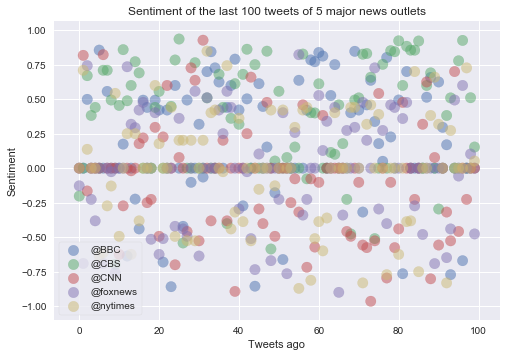

In [32]:
plt.show()
for user in users:
    plt.scatter(x=df.index, y=df[user],marker='o',alpha=0.5,s=(df[user]+10)+100)
plt.legend(loc='lower left',frameon=True,framealpha=.8)
plt.ylabel('Sentiment')
plt.xlabel('Tweets ago')
plt.title('Sentiment of the last 100 tweets of 5 major news outlets')
plt.show()

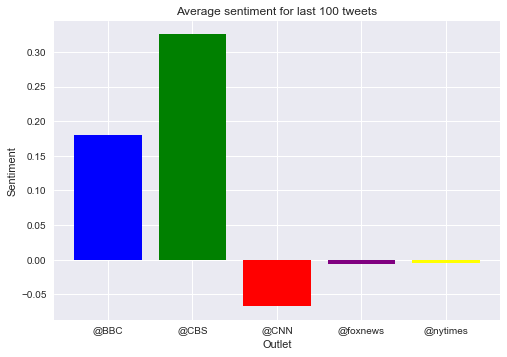

In [33]:
plt.bar(np.arange(5),df.mean(),tick_label=users, color=['blue','green','red','purple','yellow'])
plt.ylabel('Sentiment')
plt.xlabel('Outlet')
plt.title('Average sentiment for last 100 tweets')
plt.show()